In [1]:
%matplotlib notebook


=====================================================
Create a multi-extension FITS (MEF) file from scratch
=====================================================

This example demonstrates how to create a multi-extension FITS (MEF)
file from scratch using `astropy.io.fits`.

-------------------

*Originally by: Erik Bray*

*License: BSD*

-------------------




In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

HDUList objects are used to hold all the HDUs in a FITS file. This
``HDUList`` class is a subclass of Python's builtin `list`. and can be
created from scratch. For example, to create a FITS file with
three extensions:



In [3]:
from astropy.io import fits

new_hdul = fits.HDUList()
new_hdul.append(fits.ImageHDU())
new_hdul.append(fits.ImageHDU())


Write out the new file to disk:



In [4]:
new_hdul.writeto('test.fits')

Alternatively, the HDU instances can be created first (or read from an
existing FITS file).

Create a multi-extension FITS file with two empty IMAGE extensions (a
default PRIMARY HDU is prepended automatically if one is not specified;
we use ``overwrite=True`` to overwrite the file if it already exists):



In [5]:
hdu1 = fits.PrimaryHDU()
hdu2 = fits.ImageHDU()
hdu3 = fits.ImageHDU()

# Set headers
hdu2.header.set('INSTRUME', 'inst1', 'Name of instrument')
hdu3.header.set('INSTRUME', 'inst2', 'Name of instrument')

# Add data
hdu2.data=np.random.rand(1024,1024)
hdu3.data=np.random.rand(512,512)


new_hdul = fits.HDUList([hdu1, hdu2, hdu3])
new_hdul.writeto('test.fits', overwrite=True)

In [6]:
image=fits.open('test.fits')

In [7]:
image.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 ImageHDU         8   (1024, 1024)   float64   
  2                1 ImageHDU         8   (512, 512)   float64   


In [8]:
# Header of the third hdu
image[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INSTRUME= 'inst2   '           / Name of instrument                             

<IPython.core.display.Javascript object>


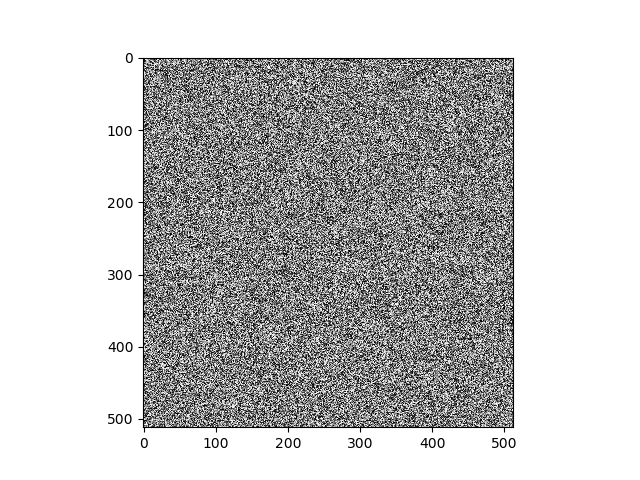

In [9]:
# Plotting data for the third hdu
image_data = image[2].data
plt.figure()
plt.imshow(image_data, cmap='gray')
#plt.colorbar()

Finally, we'll remove the file we created:



In [10]:
os.remove('test.fits')